In [22]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [23]:
nielsen15 = pd.read_csv('../../Nielsen/aggregated_nielsen_2015.csv')
nielsen16 = pd.read_csv('../..//Nielsen/aggregated_nielsen_2016.csv')
nielsen15['year'] = 2015
nielsen16['year'] = 2016

In [24]:
nielsen = pd.concat((nielsen15, nielsen16))
nielsen = nielsen[~nielsen.is_walmart]
density_path = r"C:\Users\inesn\Documents\Mines\2A\TR\econometrics\data_collection\plein_de_data\Average_Household_Size_and_Population_Density_-_County.csv"
density = pd.read_csv(density_path)
density = density[["GEOID", "B01001_calc_PopDensity"]]
nielsen = pd.merge(nielsen, density,  how='inner', left_on='guessed_store_county_fips', right_on='GEOID')
nielsen = nielsen.rename(columns={"B01001_calc_PopDensity": "Population density (people/km^2)"})

In [25]:
## Entriy/exit dates
fandom = pd.read_csv('../data_collection/plein_de_data/fandom_traitées.csv', parse_dates=['Opening_date', 'Closing_date'])[['State', 'County_name', 'County_fips', 'Opening_date', 'Closing_date']]

# We drop the state in which we do not trust our data (some mistakes stillremain)
fandom = fandom[~np.isin(fandom.State, ('CA', 'GA', 'KS', 'LA', 'TX'))]
nielsen = nielsen[~np.isin(nielsen.store_state, ('CA', 'GA', 'KS', 'LA', 'TX'))]

# We concentrate our study on the movements (entries & exits) during the fiscal years 2015 and 2016
movements = fandom[((fandom.Opening_date >= '2015-01-31') & (fandom.Opening_date <= '2017-01-31')) | ((fandom.Closing_date >= '2015-01-31') & (fandom.Closing_date <= '2017-01-31'))]
#movements['year'] = movements.Opening_date.dt.year
#movements['month'] = movements.Opening_date.dt.month

In [7]:
nielsen.groupby('product_group_descr').mean().sort_values('upc_price_std', ascending=True).head(30)

C:\Users\inesn\AppData\Local\Temp\ipykernel_6576\742464934.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nielsen.groupby('product_group_descr').mean().sort_values('upc_price_std', ascending=True).head(30)


,is_walmart,guessed_store_county_fips,purchase_year,purchase_month,upc_price,upc_price_std,nb_of_obs,year,GEOID,Population density (people/km^2)
product_group_descr,,,,,,,,,,
YEAST,0.0,34358.913876,2015.550239,6.937799,3.457727,0.190346,1.186603,2015.550239,34358.913876,522.499322
"JUICES, DRINKS-FROZEN",0.0,31276.076638,2015.491695,6.359750,1.825015,0.440367,4.133884,2015.491695,31276.076638,338.657486
ICE,0.0,29888.888000,2015.499846,6.668000,2.318100,0.465500,2.631077,2015.499846,29888.888000,401.810312
VEGETABLES - CANNED,0.0,31244.049491,2015.498625,6.517163,1.038096,0.517872,29.851215,2015.498625,31244.049491,175.737115
PASTA,0.0,31698.057646,2015.500946,6.462988,1.449016,0.546721,15.659901,2015.500946,31698.057646,204.703387
"PUDDING, DESSERTS-DAIRY",0.0,31518.914590,2015.495125,6.446009,2.434284,0.547729,4.569520,2015.495125,31518.914590,421.110079
FRUIT - CANNED,0.0,31497.732971,2015.496603,6.641208,1.654077,0.633034,10.802289,2015.496603,31497.732971,218.655061
DOUGH PRODUCTS,0.0,31231.945841,2015.496236,6.548513,1.972625,0.634339,8.207640,2015.496236,31231.945841,218.461106
SOUP,0.0,31434.031000,2015.497921,6.540429,1.506098,0.698717,25.787703,2015.497921,31434.031000,185.135259


In [8]:
categories = [
    "FRESH PRODUCE",
    "BREAD AND BAKED GOODS",
    "MILK",
    "SNACKS",
    "PACKAGED MEATS-DELI",
    "CHEESE",
    "UNPREP MEAT/POULTRY/SEAFOOD-FRZN",
    "CARBONATED BEVERAGES",
    "CONDIMENTS, GRAVIES, AND SAUCES",
    "CANDY",
    "JUICE, DRINKS - CANNED, BOTTLED",
    "EGGS",
    "CEREAL",
    "PASTA",
    "COT CHEESE, SOUR CREAM, TOPPINGS",
    "PAPER PRODUCTS",
    "YOGURT"
]

In [9]:
state_for_cat = {"FRESH PRODUCE" : "FL",
    "BREAD AND BAKED GOODS" : "FL",
    "MILK" : "FL",
    "SNACKS" : "FL",
    "PACKAGED MEATS-DELI" : "FL",
    "CHEESE" : "FL",
    "UNPREP MEAT/POULTRY/SEAFOOD-FRZN" : "FL",
    "CARBONATED BEVERAGES" : "FL",
    "CONDIMENTS, GRAVIES, AND SAUCES" : "FL",
    "CANDY" : "FL",
    "JUICE, DRINKS - CANNED, BOTTLED" : "FL",
    "EGGS" : "FL",
    "CEREAL" : "FL",
    "PASTA" : "FL"}

## PREMIER MODELE

$$Prices_{i, t} = \alpha + \beta treat_i + \gamma treat_i* post_t$$

#### In a single state

##### FL

In [16]:
state = "FL"

In [17]:
#We choose to focus on milk prices
#for category in categories:
#    product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)]

product_group = nielsen[(nielsen.store_state == state)]
# The control group is composed by all states where nothing (no entry nor exit) happened.
control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()
print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")


# The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
count = movements.groupby('County_fips').count()
count = count[count.State == 1] # No more than one movement in the treatement group
treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')
print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")


# We create our dummies for the regression
control['treat'] = False
control['interaction'] = False

treatment['treat'] = True
treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                           (treatment.purchase_year > treatment.Opening_date.dt.year))


# Final dataset for the regression :

df = pd.concat((control, treatment))[['upc_price', 'treat', 'interaction']]
df = df[df.upc_price != 0]
reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction', data=df)
results0 = reg0.fit()
if abs(results0.params[2] / results0.bse[2]) > 0. :
    print("=========================================================")
#    print(category)
    print(f"Coef : {np.exp(results0.params[2])-1}")
    print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
    print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
    print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

Size of the control group: 39.
Size of the treatment group: 10.
Coef : 0.029492975603897298
Coef/err : 3.2867990385096095
CI_up : 0.011802582813581042
CI_down : 0.04749266785874484


##### SC

In [224]:
state = "SC"

In [225]:
# We choose to focus on milk prices
for category in categories:
    product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)]


    # The control group is composed by all states where nothing (no entry nor exit) happened.
    control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()
    print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")


    # The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
    count = movements.groupby('County_fips').count()
    count = count[count.State == 1] # No more than one movement in the treatement group
    treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
    treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

    treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
    treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')
    print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")


    # We create our dummies for the regression
    control['treat'] = False
    control['interaction'] = False

    treatment['treat'] = True
    treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                               (treatment.purchase_year > treatment.Opening_date.dt.year))


    # Final dataset for the regression :

    df = pd.concat((control, treatment))[['upc_price', 'treat', 'interaction']]
    df = df[df.upc_price != 0]
    reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction', data=df)
    results0 = reg0.fit()
    if abs(results0.params[2] / results0.bse[2]) > 1. :
        print("=========================================================")
        print(category)
        print(f"Coef : {np.exp(results0.params[2])-1}")
        print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
        print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
        print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

Size of the control group: 27.
Size of the treatment group: 9.
Size of the control group: 28.
Size of the treatment group: 9.
Size of the control group: 28.
Size of the treatment group: 9.
MILK
Coef : -0.11234085719451792
Coef/err : 5.539880558425527
CI_up : -0.14904728401491685
CI_down : -0.0740510735734281
Size of the control group: 27.
Size of the treatment group: 9.
Size of the control group: 27.
Size of the treatment group: 9.
Size of the control group: 28.
Size of the treatment group: 9.
CHEESE
Coef : -0.10009062183549111
Coef/err : 3.6871429462034726
CI_up : -0.14923306464147623
CI_down : -0.04810958765439366
Size of the control group: 27.
Size of the treatment group: 9.
UNPREP MEAT/POULTRY/SEAFOOD-FRZN
Coef : -0.09037190083710256
Coef/err : 2.528124822726927
CI_up : -0.1548788764709531
CI_down : -0.020941193220255006
Size of the control group: 28.
Size of the treatment group: 9.
Size of the control group: 28.
Size of the treatment group: 9.
Size of the control group: 28.
Size o

##### VA

In [16]:
state = "VA"

In [18]:
# We choose to focus on milk prices
for category in categories:
    product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)]


    # The control group is composed by all states where nothing (no entry nor exit) happened.
    control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()
    print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")


    # The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
    count = movements.groupby('County_fips').count()
    count = count[count.State == 1] # No more than one movement in the treatement group
    treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
    treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

    treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
    treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')
    print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")


    # We create our dummies for the regression
    control['treat'] = False
    control['interaction'] = False

    treatment['treat'] = True
    treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                               (treatment.purchase_year > treatment.Opening_date.dt.year))


    # Final dataset for the regression :

    df = pd.concat((control, treatment))[['upc_price', 'treat', 'interaction']]
    df = df[df.upc_price != 0]
    reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction', data=df)
    results0 = reg0.fit()
    if abs(results0.params[2] / results0.bse[2]) > 0. :
        print("=========================================================")
        print(category)
        print(f"Coef : {np.exp(results0.params[2])-1}")
        print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
        print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
        print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

Size of the control group: 95.
Size of the treatment group: 10.
FRESH PRODUCE
Coef : 0.059596233510349705
Coef/err : 1.613701628491074
CI_up : -0.012383744373377414
CI_down : 0.13682229476565366
Size of the control group: 95.
Size of the treatment group: 10.
BREAD AND BAKED GOODS
Coef : 0.09617642994779785
Coef/err : 2.617317377926245
CI_up : 0.023290930248326847
CI_down : 0.1742533135532638
Size of the control group: 93.
Size of the treatment group: 10.
MILK
Coef : -0.03752363956982008
Coef/err : 1.4607825475910312
CI_up : -0.08569510422643423
CI_down : 0.013185807785880632
Size of the control group: 95.
Size of the treatment group: 10.
SNACKS
Coef : 0.09070167476977331
Coef/err : 2.374409321778223
CI_up : 0.015226806371168244
CI_down : 0.1717875610454065
Size of the control group: 94.
Size of the treatment group: 10.
PACKAGED MEATS-DELI
Coef : -0.02233878291458058
Coef/err : 0.5396540155831038
CI_up : -0.09939834388702484
CI_down : 0.061314343478223954
Size of the control group: 93.


##### NC

In [228]:
state = "NC"

In [229]:
# We choose to focus on milk prices
for category in categories:
    product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)]


    # The control group is composed by all states where nothing (no entry nor exit) happened.
    control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()
    print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")


    # The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
    count = movements.groupby('County_fips').count()
    count = count[count.State == 1] # No more than one movement in the treatement group
    treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
    treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

    treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
    treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')
    print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")


    # We create our dummies for the regression
    control['treat'] = False
    control['interaction'] = False

    treatment['treat'] = True
    treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                               (treatment.purchase_year > treatment.Opening_date.dt.year))


    # Final dataset for the regression :

    df = pd.concat((control, treatment))[['upc_price', 'treat', 'interaction']]
    df = df[df.upc_price != 0]
    reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction', data=df)
    results0 = reg0.fit()
    if abs(results0.params[2] / results0.bse[2]) > 1. :
        print("=========================================================")
        print(category)
        print(f"Coef : {np.exp(results0.params[2])-1}")
        print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
        print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
        print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

Size of the control group: 65.
Size of the treatment group: 7.
Size of the control group: 65.
Size of the treatment group: 7.
Size of the control group: 64.
Size of the treatment group: 7.
Size of the control group: 65.
Size of the treatment group: 7.
SNACKS
Coef : 0.10280218679695086
Coef/err : 2.285277408845297
CI_up : 0.013960373157137385
CI_down : 0.1994281979850725
Size of the control group: 65.
Size of the treatment group: 7.
Size of the control group: 65.
Size of the treatment group: 7.
Size of the control group: 64.
Size of the treatment group: 7.
Size of the control group: 65.
Size of the treatment group: 7.
Size of the control group: 65.
Size of the treatment group: 7.
CONDIMENTS, GRAVIES, AND SAUCES
Coef : 0.06076014224882087
Coef/err : 1.2980161463365374
CI_up : -0.029706756329480166
CI_down : 0.15966187204105098
Size of the control group: 65.
Size of the treatment group: 7.
CANDY
Coef : 0.14284600334524988
Coef/err : 2.0287859582061354
CI_up : 0.004429002348988131
CI_down 

#### In all states

In [195]:
# We choose to focus on milk prices
for category in categories:
    product_group = nielsen[(nielsen.product_group_descr == category)]


    # The control group is composed by all states where nothing (no entry nor exit) happened.
    control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()
    print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")


    # The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
    count = movements.groupby('County_fips').count()
    count = count[count.State == 1] # No more than one movement in the treatement group
    treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
    treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

    treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
    treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')
    print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")


    # We create our dummies for the regression
    control['treat'] = False
    control['interaction'] = False

    treatment['treat'] = True
    treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                               (treatment.purchase_year > treatment.Opening_date.dt.year))

    # Final dataset for the regression :

    df = pd.concat((control, treatment))[['upc_price', 'treat', 'interaction']]
    df = df[df.upc_price != 0]
    reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction', data=df)
    results0 = reg0.fit()
    if abs(results0.params[2] / results0.bse[2]) > 1. :
        print("=========================================================")
        print(category)
        print(f"Coef : {np.exp(results0.params[2])-1}")
        print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
        print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
        print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

Size of the control group: 1831.
Size of the treatment group: 91.
Size of the control group: 1836.
Size of the treatment group: 91.
Size of the control group: 1822.
Size of the treatment group: 91.
MILK
Coef : -0.05959158373209339
Coef/err : 6.201796830566224
CI_up : -0.077676211161124
CI_down : -0.04115235876019929
Size of the control group: 1837.
Size of the treatment group: 91.
SNACKS
Coef : 0.01971258231192108
Coef/err : 1.5904346195770565
CI_up : -0.00452605598484046
CI_down : 0.04454140339549828
Size of the control group: 1816.
Size of the treatment group: 91.
Size of the control group: 1816.
Size of the treatment group: 91.
CHEESE
Coef : -0.01883707470513718
Coef/err : 1.537049729843573
CI_up : -0.042344038275416884
CI_down : 0.005246899146892581
Size of the control group: 1794.
Size of the treatment group: 90.
UNPREP MEAT/POULTRY/SEAFOOD-FRZN
Coef : -0.03345220251013248
Coef/err : 2.379012373360577
CI_up : -0.06017045899311435
CI_down : -0.0059743771922259326
Size of the contro

## Build a better control group

##### SC analysis

In [61]:
state = "SC"
category = "CHEESE"

In [65]:
#for state in states :
    # 
product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)&(nielsen["Population density (people/km^2)"] > 80)&(nielsen["Population density (people/km^2)"] < 200)
                       ]
    # The control group is composed by all states where nothing (no entry nor exit) happened.
control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()

# The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
count = movements.groupby('County_fips').count()
count = count[count.State == 1] # No more than one movement in the treatement group
treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')

# We create our dummies for the regression
control['treat'] = False
control['interaction'] = False
control['time_effects'] = list(zip(control.purchase_year, control.purchase_month))

treatment['treat'] = True
treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                           (treatment.purchase_year > treatment.Opening_date.dt.year))
treatment['time_effects'] = list(zip(treatment.purchase_year, treatment.purchase_month))
treatment.head(50)

,is_walmart,store_state,guessed_store_county,guessed_store_county_fips,purchase_year,purchase_month,product_group_descr,upc_price,upc_price_std,nb_of_obs,...,County_name,County_fips,Opening_date,Closing_date,treat,purchase_0,opening_0,interaction,interaction2,time_effects
0,False,SC,ANDERSON,45007,2015,1,CHEESE,3.047692,0.904923,13,...,Anderson,45007,2015-05-06,NaT,True,1,5,False,False,"(2015, 1)"
1,False,SC,ANDERSON,45007,2015,2,CHEESE,3.286923,1.566522,26,...,Anderson,45007,2015-05-06,NaT,True,2,5,False,False,"(2015, 2)"
2,False,SC,ANDERSON,45007,2015,3,CHEESE,3.119000,0.954021,20,...,Anderson,45007,2015-05-06,NaT,True,3,5,False,False,"(2015, 3)"
3,False,SC,ANDERSON,45007,2015,4,CHEESE,2.924783,0.794743,23,...,Anderson,45007,2015-05-06,NaT,True,4,5,False,False,"(2015, 4)"
4,False,SC,ANDERSON,45007,2015,5,CHEESE,2.733600,1.023507,25,...,Anderson,45007,2015-05-06,NaT,True,5,5,False,False,"(2015, 5)"
5,False,SC,ANDERSON,45007,2015,6,CHEESE,2.742353,0.700103,17,...,Anderson,45007,2015-05-06,NaT,True,6,5,True,True,"(2015, 6)"
6,False,SC,ANDERSON,45007,2015,7,CHEESE,2.818846,0.922923,26,...,Anderson,45007,2015-05-06,NaT,True,7,5,True,True,"(2015, 7)"
7,False,SC,ANDERSON,45007,2015,8,CHEESE,3.020556,0.996804,18,...,Anderson,45007,2015-05-06,NaT,True,8,5,True,True,"(2015, 8)"
8,False,SC,ANDERSON,45007,2015,9,CHEESE,3.012500,1.174402,16,...,Anderson,45007,2015-05-06,NaT,True,9,5,True,True,"(2015, 9)"
9,False,SC,ANDERSON,45007,2015,10,CHEESE,2.965294,1.086394,17,...,Anderson,45007,2015-05-06,NaT,True,10,5,True,True,"(2015, 10)"


In [63]:
#for state in states :
    # 
product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)&(nielsen["Population density (people/km^2)"] > 80)&(nielsen["Population density (people/km^2)"] < 200)
                       ]
    # The control group is composed by all states where nothing (no entry nor exit) happened.
control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()

# The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
count = movements.groupby('County_fips').count()
count = count[count.State == 1] # No more than one movement in the treatement group
treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')

# We create our dummies for the regression
control['treat'] = False
control['interaction'] = False
control['time_effects'] = list(zip(control.purchase_year, control.purchase_month))

treatment['treat'] = True
treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                           (treatment.purchase_year > treatment.Opening_date.dt.year))
treatment['time_effects'] = list(zip(treatment.purchase_year, treatment.purchase_month))


# Final dataset for the regression :

df0 = pd.concat((control, treatment))
df = df0[['upc_price', 'treat', 'interaction','time_effects']]
df = df[df.upc_price != 0]
reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction + C(time_effects)', data=df)
results0 = reg0.fit()

if abs(results0.params[2] / results0.bse[2]) > 0. :
    print("=========================================================")
 #   print(state)
    print(f"Coef : {np.exp(results0.params[2])-1}")
    print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
    print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
    print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

Coef : 0.06131015477801327
Coef/err : 2.0681126139331876
CI_up : 0.002525498651301028
CI_down : 0.1235417414821367


In [54]:
product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)]
# The control group is composed by all states where nothing (no entry nor exit) happened.
control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()

In [55]:
#control group analysis
print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")

Size of the control group: 28.


8.71753759395985 166.025133721354


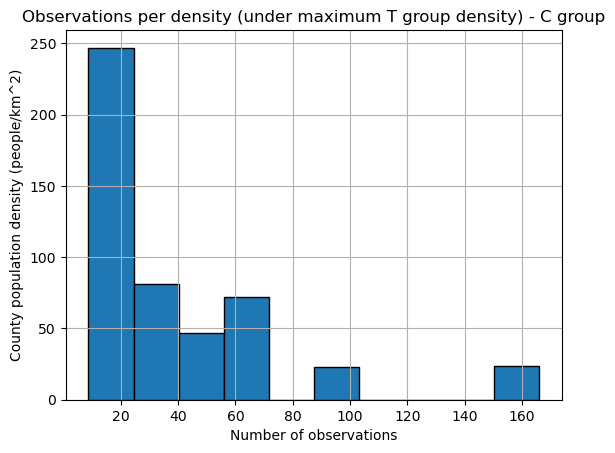

In [56]:
print(control["Population density (people/km^2)"].min(),control["Population density (people/km^2)"].max())
plt.hist(control["Population density (people/km^2)"], edgecolor='black')
plt.xlabel('Number of observations')
plt.ylabel('County population density (people/km^2)')
plt.title('Observations per density (under maximum T group density) - C group')
#plt.ylim(0, 3000)
plt.grid(True)
plt.show()
#savefig("../../results_summary/density_control_hist_0.png")

In [57]:
# The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
count = movements.groupby('County_fips').count()
count = count[count.State == 1] # No more than one movement in the treatement group
treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')

In [58]:
# treatment group analysis
print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")

Size of the treatment group: 9.


29.2250338775805 245.119501334035


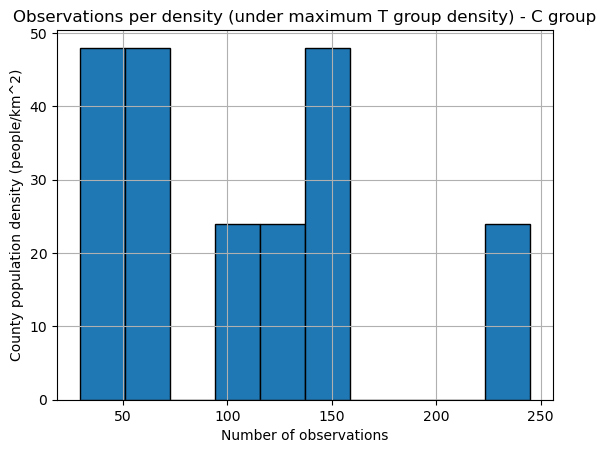

In [59]:
print(treatment["Population density (people/km^2)"].min(),treatment["Population density (people/km^2)"].max())
plt.hist(treatment["Population density (people/km^2)"], edgecolor='black')
plt.xlabel('Number of observations')
plt.ylabel('County population density (people/km^2)')
plt.title('Observations per density (under maximum T group density) - C group')
#plt.ylim(0, 3000)
plt.grid(True)
plt.show()
#savefig("../../results_summary/density_control_hist_0.png")

In [60]:
# We create our dummies for the regression
control['treat'] = False
control['interaction'] = False
control['time_effects'] = list(zip(control.purchase_year, control.purchase_month))

treatment['treat'] = True
treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                               (treatment.purchase_year > treatment.Opening_date.dt.year))
treatment['time_effects'] = list(zip(treatment.purchase_year, treatment.purchase_month))


# Final dataset for the regression :

df0 = pd.concat((control, treatment))
df = df0[['upc_price', 'treat', 'interaction','time_effects']]
df = df[df.upc_price != 0]
reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction + C(time_effects)', data=df)
results0 = reg0.fit()
y_hat = results0.fittedvalues
u_hat = results0.resid

In [39]:
results0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(upc_price)   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.898
Date:                Sun, 06 Nov 2022   Prob (F-statistic):            0.00547
Time:                        23:34:26   Log-Likelihood:                -109.97
No. Observations:                 667   AIC:                             271.9
Df Residuals:                     641   BIC:                             389.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.9551      0.057     16.781      0.000       0.843       1.067
treat[T.True]                     0.0167      0.030      0.552      0.581      -0.043       0.076
interaction[T.True]              -0.1249      0.044     -2.860      0.004      -0.211      -0.039
C(time_effects)[T.(2015, 2)]      0.0151      0.077      0.195      0.845      -0.137       0.167
C(time_effects)[T.(2015, 3)]     -0.0113      0.079     -0.144      0.886      -0.165       0.143
C(time_effects)[T.(2015, 4)]     -0.0860      0.081     -1.065      0.287      -0.245       0.073
C(time_effects)[T.(2015, 5)]     -0.0338      0.079     -0.431      0.667      -0.188       0.120
C(time_effects)[T.(2015, 6)]     -0.0333      0.079     -0.424      0.672      -0.187       0.121
C(time_effects)[T.(2015, 7)]     -0.1043      0.078     -1.340      0.181      -0.257       0.049
C(time_effects)[T.(2015, 8)]     -0.1389      0.077     -1.796      0.073      -0.291       0.013
C(time_effects)[T.(2015, 9)]     -0.1329      0.080     -1.660      0.097      -0.290       0.024
C(time_effects)[T.(2015, 10)]    -0.0242      0.080     -0.303      0.762      -0.181       0.133
C(time_effects)[T.(2015, 11)]    -0.0003      0.078     -0.004      0.997      -0.153       0.153
C(time_effects)[T.(2015, 12)]     0.0933      0.080      1.165      0.245      -0.064       0.251
C(time_effects)[T.(2016, 1)]      0.0717      0.079      0.911      0.363      -0.083       0.226
C(time_effects)[T.(2016, 2)]      0.0606      0.079      0.762      0.446      -0.095       0.217
C(time_effects)[T.(2016, 3)]      0.0249      0.079      0.317      0.752      -0.130       0.180
C(time_effects)[T.(2016, 4)]     -0.0459      0.080     -0.571      0.568      -0.204       0.112
C(time_effects)[T.(2016, 5)]     -0.0293      0.078     -0.374      0.709      -0.183       0.125
C(time_effects)[T.(2016, 6)]      0.0249      0.079      0.317      0.751      -0.129       0.179
C(time_effects)[T.(2016, 7)]     -0.1149      0.080     -1.445      0.149      -0.271       0.041
C(time_effects)[T.(2016, 8)]     -0.1697      0.078     -2.171      0.030      -0.323      -0.016
C(time_effects)[T.(2016, 9)]     -0.0497      0.080     -0.625      0.532      -0.206       0.106
C(time_effects)[T.(2016, 10)]    -0.0244      0.079     -0.309      0.757      -0.179       0.130
C(time_effects)[T.(2016, 11)]    -0.0280      0.080     -0.348      0.728      -0.186       0.130
C(time_effects)[T.(2016, 12)]     0.0176      0.081      0.217      0.828      -0.142       0.177
==============================================================================
Omnibus:                       34.466   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.520
Skew

Text(0.5, 0, 'observation')

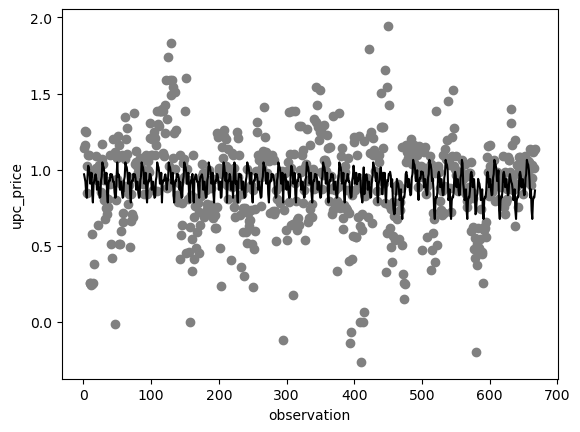

In [41]:
#pd.set_option("display.max_rows", None)
#y_hat.shape[0]
plt.plot(np.arange(1, 668), np.log(df['upc_price']), color='grey', marker='o', linestyle='')
plt.plot(np.arange(1, 668), results0.fittedvalues, color='black', linestyle='-')
plt.ylabel('upc_price')
plt.xlabel('observation')
#if abs(results0.params[2] / results0.bse[2]) > 0. :
#    print("=========================================================")
#    print(category)
#    print(f"Coef : {np.exp(results0.params[2])-1}")
#    print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
#    print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
#    print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

In [42]:
y_hat = y_hat.rename("fitted_value").to_frame()
new = pd.merge(df0, y_hat, left_index=True, right_index=True)
new['upc_price']=np.log(new['upc_price'])

Text(0.5, 0, 'observation')

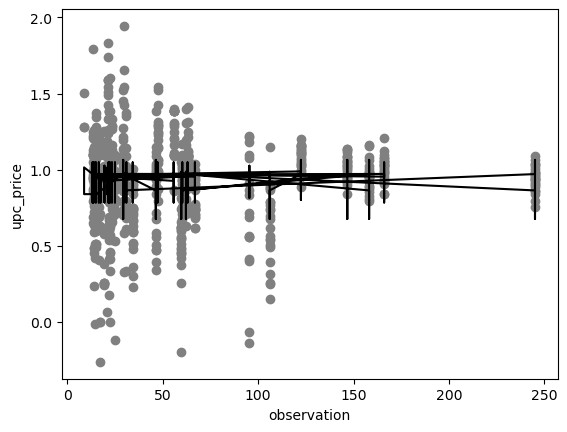

In [43]:
plt.plot('Population density (people/km^2)','upc_price', data = new, color='grey', marker='o', linestyle='')
plt.plot('Population density (people/km^2)','fitted_value', data = new, color='black', linestyle='-')
plt.ylabel('upc_price')
plt.xlabel('observation')
#plt.xlim(445,455)

In [169]:
new['residual']=np.abs(new['upc_price']-new['fitted_value'])
new = new.sort_values(by='residual', ascending=False)

In [179]:
#new.tail(50)
new.groupby(['guessed_store_county','guessed_store_county_fips']).mean("purchase_year").tail(50)
#new[new["guessed_store_county"]=="NEW HANOVER"]

,,is_walmart,purchase_year,purchase_month,upc_price,upc_price_std,nb_of_obs,year,GEOID,Population density (people/km^2),treat,interaction,County_fips,fitted_value,residual
guessed_store_county,guessed_store_county_fips,,,,,,,,,,,,,,
DAVIE,37059,0.0,2015.500000,6.500000,0.781200,1.469987,23.375000,2015.500000,37059.0,61.483133,0.0,0.000000,NaN,0.729653,0.161160
DUPLIN,37061,0.0,2015.500000,6.500000,0.672343,1.514431,30.458333,2015.500000,37061.0,27.989342,0.0,0.000000,NaN,0.729653,0.157031
EDGECOMBE,37065,0.0,2015.521739,6.565217,0.526190,1.044577,11.217391,2015.521739,37065.0,40.740505,0.0,0.000000,NaN,0.730662,0.273162
FORSYTH,37067,0.0,2015.500000,6.500000,0.746165,1.388721,383.208333,2015.500000,37067.0,351.818409,1.0,0.166667,37067.0,0.769597,0.056000
FRANKLIN,37069,0.0,2015.500000,6.500000,0.703882,1.166639,28.750000,2015.500000,37069.0,50.953202,0.0,0.000000,NaN,0.729653,0.166262
GASTON,37071,0.0,2015.500000,6.500000,0.693779,1.186103,192.666667,2015.500000,37071.0,235.083410,0.0,0.000000,NaN,0.729653,0.056148
GRANVILLE,37077,0.0,2015.500000,6.500000,0.763862,1.374335,34.541667,2015.500000,37077.0,42.728884,0.0,0.000000,NaN,0.729653,0.130815
HALIFAX,37083,0.0,2015.529412,6.823529,0.867938,0.994053,2.588235,2015.529412,37083.0,27.600904,0.0,0.000000,NaN,0.725548,0.382447
HAYWOOD,37087,0.0,2015.500000,6.500000,0.661440,1.220587,50.416667,2015.500000,37087.0,42.151369,0.0,0.000000,NaN,0.729653,0.124114


##### NC

In [88]:
state = "SC"
category = 'CHEESE'

Size of the control group: 28.
Size of the treatment group: 9.


Text(0.5, 0, 'observation')

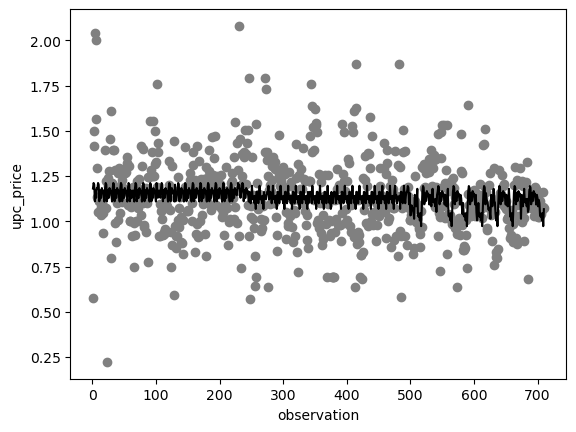

In [90]:
product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)]


# The control group is composed by all states where nothing (no entry nor exit) happened.
control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()
print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")


# The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
count = movements.groupby('County_fips').count()
count = count[count.State == 1] # No more than one movement in the treatement group
treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')
print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")


# We create our dummies for the regression
control['treat'] = False
control['interaction'] = False
control['time_effects'] = list(zip(control.purchase_year, control.purchase_month))

treatment['treat'] = True
treatment['interaction'] = ((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                               (treatment.purchase_year > treatment.Opening_date.dt.year)
treatment['time_effects'] = list(zip(treatment.purchase_year, treatment.purchase_month))


# Final dataset for the regression :

df = pd.concat((control, treatment))[['upc_price', 'treat', 'interaction','time_effects']]
df = df[df.upc_price != 0]
reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction + C(time_effects)', data=df)
results0 = reg0.fit()
y_hat = results0.fittedvalues
u_hat = results0.resid
#pd.set_option("display.max_rows", None)
#y_hat.shape[0]
plt.plot(np.arange(1, 711), np.log(df['upc_price']), color='grey', marker='o', linestyle='')
plt.plot(np.arange(1, 711), results0.fittedvalues, color='black', linestyle='-')
plt.ylabel('upc_price')
plt.xlabel('observation')
#if abs(results0.params[2] / results0.bse[2]) > 0. :
#    print("=========================================================")
#    print(category)
#    print(f"Coef : {np.exp(results0.params[2])-1}")
#    print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
#    print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
#    print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

In [91]:
results0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(upc_price)   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.449
Date:                Fri, 04 Nov 2022   Prob (F-statistic):             0.0735
Time:                        14:23:56   Log-Likelihood:                 120.00
No. Observations:                 710   AIC:                            -188.0
Df Residuals:                     684   BIC:                            -69.30
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.1810      0.039     30.170      0.000       1.104       1.258
treat[T.True]                    -0.0168      0.020     -0.847      0.397      -0.056       0.022
interaction[T.True]              -0.0785      0.033     -2.395      0.017      -0.143      -0.014
C(time_effects)[T.(2015, 2)]      0.0307      0.054      0.570      0.569      -0.075       0.136
C(time_effects)[T.(2015, 3)]      0.0213      0.054      0.397      0.692      -0.084       0.127
C(time_effects)[T.(2015, 4)]     -0.0703      0.054     -1.296      0.195      -0.177       0.036
C(time_effects)[T.(2015, 5)]     -0.0086      0.054     -0.161      0.872      -0.114       0.097
C(time_effects)[T.(2015, 6)]     -0.0532      0.056     -0.955      0.340      -0.163       0.056
C(time_effects)[T.(2015, 7)]     -0.0509      0.054     -0.939      0.348      -0.157       0.056
C(time_effects)[T.(2015, 8)]      0.0025      0.055      0.046      0.963      -0.105       0.110
C(time_effects)[T.(2015, 9)]     -0.0220      0.054     -0.405      0.686      -0.129       0.085
C(time_effects)[T.(2015, 10)]    -0.0105      0.055     -0.191      0.848      -0.118       0.097
C(time_effects)[T.(2015, 11)]    -0.0371      0.054     -0.683      0.495      -0.144       0.069
C(time_effects)[T.(2015, 12)]    -0.0718      0.056     -1.288      0.198      -0.181       0.038
C(time_effects)[T.(2016, 1)]     -0.0181      0.055     -0.331      0.741      -0.125       0.089
C(time_effects)[T.(2016, 2)]     -0.0366      0.054     -0.675      0.500      -0.143       0.070
C(time_effects)[T.(2016, 3)]     -0.0813      0.055     -1.488      0.137      -0.189       0.026
C(time_effects)[T.(2016, 4)]     -0.0459      0.055     -0.832      0.406      -0.154       0.062
C(time_effects)[T.(2016, 5)]      0.0153      0.054      0.281      0.779      -0.091       0.122
C(time_effects)[T.(2016, 6)]     -0.0536      0.055     -0.984      0.325      -0.161       0.053
C(time_effects)[T.(2016, 7)]     -0.0600      0.056     -1.079      0.281      -0.169       0.049
C(time_effects)[T.(2016, 8)]     -0.0435      0.055     -0.788      0.431      -0.152       0.065
C(time_effects)[T.(2016, 9)]     -0.0812      0.055     -1.484      0.138      -0.189       0.026
C(time_effects)[T.(2016, 10)]    -0.0402      0.054     -0.747      0.456      -0.146       0.066
C(time_effects)[T.(2016, 11)]    -0.1125      0.056     -2.019      0.044      -0.222      -0.003
C(time_effects)[T.(2016, 12)]    -0.0186      0.054     -0.347      0.728      -0.124       0.087
==============================================================================
Omnibus:                       63.471   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.400
Skew